In [ ]:
!pip install wandb

In [3]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/gdrive', force_remount=True)
import wandb
from wandb.keras import (
   WandbMetricsLogger,
   WandbModelCheckpoint,
)

Mounted at /gdrive


In [4]:
run = wandb.init(project="Akhund_human")

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [5]:
config = wandb.config
wandb_callbacks = [
   WandbMetricsLogger(log_freq=5),
   WandbModelCheckpoint("models"),
]

In [7]:
dataset_path_train = "/gdrive/MyDrive/dataset/Akhund-Human"
width=height=224
idg=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    brightness_range=(0.8,1),
    zoom_range=0.1,
    validation_split=0.1,
)

train_data=idg.flow_from_directory(
    dataset_path_train,
    target_size=(width,height),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    subset='training',
)
val_data=idg.flow_from_directory(
    dataset_path_train,
    target_size=(width,height),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    subset='validation',
)

Found 418 images belonging to 2 classes.
Found 45 images belonging to 2 classes.


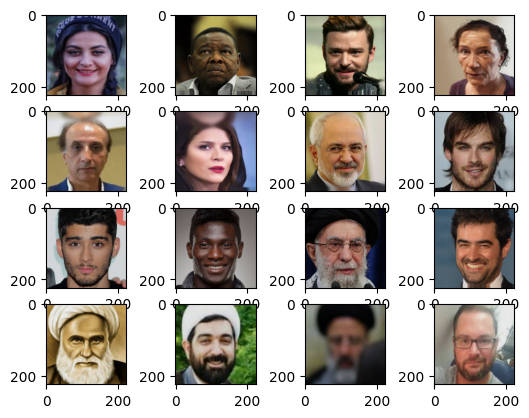

In [8]:
train_images = next(train_data)[0]
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.imshow(train_images[i])

In [9]:
model = tf.keras.applications.MobileNet(
    include_top=False,
    weights="imagenet",
    input_shape=(width,height,3),
    pooling ='avg'
    )

17225924/17225924 [==============================] - 0s 0us/step


In [25]:
for layer in model.layers[0:-10]:
  layer.trainable = False

In [26]:
my_model = models.Sequential([
    model,
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(2, activation="softmax"),
])

In [27]:
my_model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              loss = tf.keras.losses.categorical_crossentropy,
              metrics = ['accuracy'])

checkpoint = tf.keras.callbacks.ModelCheckpoint("/gdrive/MyDrive/best_model_Akhund_human",
                                            save_best_only=True)
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [28]:
history = my_model.fit(
    train_data,
    validation_data=val_data,
    epochs=20 ,
    callbacks=[stop_early, checkpoint,wandb_callbacks]
    )

Epoch 1/20
14/14 [==============================] - ETA: 0s - loss: 0.8201 - accuracy: 0.5766

wandb: Adding directory to artifact (./models)... Done. 0.0s


14/14 [==============================] - 31s 2s/step - loss: 0.8201 - accuracy: 0.5766 - val_loss: 0.5933 - val_accuracy: 0.6444
Epoch 2/20
14/14 [==============================] - ETA: 0s - loss: 0.6643 - accuracy: 0.6388

wandb: Adding directory to artifact (./models)... Done. 0.0s


14/14 [==============================] - 29s 2s/step - loss: 0.6643 - accuracy: 0.6388 - val_loss: 0.5018 - val_accuracy: 0.7556
Epoch 3/20
14/14 [==============================] - ETA: 0s - loss: 0.6354 - accuracy: 0.6794

wandb: Adding directory to artifact (./models)... Done. 0.0s


14/14 [==============================] - 29s 2s/step - loss: 0.6354 - accuracy: 0.6794 - val_loss: 0.4598 - val_accuracy: 0.8444
Epoch 4/20
14/14 [==============================] - ETA: 0s - loss: 0.5436 - accuracy: 0.7297

wandb: Adding directory to artifact (./models)... Done. 0.0s


14/14 [==============================] - 29s 2s/step - loss: 0.5436 - accuracy: 0.7297 - val_loss: 0.4303 - val_accuracy: 0.8444
Epoch 5/20
14/14 [==============================] - ETA: 0s - loss: 0.4827 - accuracy: 0.7536

wandb: Adding directory to artifact (./models)... Done. 0.0s


14/14 [==============================] - 29s 2s/step - loss: 0.4827 - accuracy: 0.7536 - val_loss: 0.3721 - val_accuracy: 0.9111
Epoch 6/20
14/14 [==============================] - ETA: 0s - loss: 0.3824 - accuracy: 0.8421

wandb: Adding directory to artifact (./models)... Done. 0.0s


14/14 [==============================] - 29s 2s/step - loss: 0.3824 - accuracy: 0.8421 - val_loss: 0.3620 - val_accuracy: 0.9111
Epoch 7/20
14/14 [==============================] - ETA: 0s - loss: 0.3723 - accuracy: 0.8373

wandb: Adding directory to artifact (./models)... Done. 0.0s


14/14 [==============================] - 28s 2s/step - loss: 0.3723 - accuracy: 0.8373 - val_loss: 0.3381 - val_accuracy: 0.9333
Epoch 8/20
14/14 [==============================] - ETA: 0s - loss: 0.3455 - accuracy: 0.8421

wandb: Adding directory to artifact (./models)... Done. 0.0s


14/14 [==============================] - 28s 2s/step - loss: 0.3455 - accuracy: 0.8421 - val_loss: 0.3111 - val_accuracy: 0.9333
Epoch 9/20
14/14 [==============================] - ETA: 0s - loss: 0.2977 - accuracy: 0.8876

wandb: Adding directory to artifact (./models)... Done. 0.0s


14/14 [==============================] - 36s 3s/step - loss: 0.2977 - accuracy: 0.8876 - val_loss: 0.2921 - val_accuracy: 0.9333
Epoch 10/20
14/14 [==============================] - ETA: 0s - loss: 0.2604 - accuracy: 0.8900

wandb: Adding directory to artifact (./models)... Done. 0.0s


14/14 [==============================] - 29s 2s/step - loss: 0.2604 - accuracy: 0.8900 - val_loss: 0.2634 - val_accuracy: 0.9333
Epoch 11/20
14/14 [==============================] - ETA: 0s - loss: 0.2540 - accuracy: 0.9019

wandb: Adding directory to artifact (./models)... Done. 0.1s


14/14 [==============================] - 20s 1s/step - loss: 0.2540 - accuracy: 0.9019 - val_loss: 0.3232 - val_accuracy: 0.9333
Epoch 12/20
14/14 [==============================] - ETA: 0s - loss: 0.2416 - accuracy: 0.9067

wandb: Adding directory to artifact (./models)... Done. 0.1s


14/14 [==============================] - 29s 2s/step - loss: 0.2416 - accuracy: 0.9067 - val_loss: 0.2551 - val_accuracy: 0.9333
Epoch 13/20
14/14 [==============================] - ETA: 0s - loss: 0.2140 - accuracy: 0.9211

wandb: Adding directory to artifact (./models)... Done. 0.1s


14/14 [==============================] - 20s 2s/step - loss: 0.2140 - accuracy: 0.9211 - val_loss: 0.2835 - val_accuracy: 0.9333
Epoch 14/20
14/14 [==============================] - ETA: 0s - loss: 0.2146 - accuracy: 0.9306

wandb: Adding directory to artifact (./models)... Done. 0.0s


14/14 [==============================] - 19s 1s/step - loss: 0.2146 - accuracy: 0.9306 - val_loss: 0.2616 - val_accuracy: 0.9556
Epoch 15/20
14/14 [==============================] - ETA: 0s - loss: 0.2062 - accuracy: 0.9258

wandb: Adding directory to artifact (./models)... Done. 0.0s


14/14 [==============================] - 19s 1s/step - loss: 0.2062 - accuracy: 0.9258 - val_loss: 0.2809 - val_accuracy: 0.9333
Epoch 16/20
14/14 [==============================] - ETA: 0s - loss: 0.1829 - accuracy: 0.9282

wandb: Adding directory to artifact (./models)... Done. 0.0s


14/14 [==============================] - 29s 2s/step - loss: 0.1829 - accuracy: 0.9282 - val_loss: 0.2479 - val_accuracy: 0.9333
Epoch 17/20
14/14 [==============================] - ETA: 0s - loss: 0.1840 - accuracy: 0.9402

wandb: Adding directory to artifact (./models)... Done. 0.0s


14/14 [==============================] - 21s 2s/step - loss: 0.1840 - accuracy: 0.9402 - val_loss: 0.2631 - val_accuracy: 0.9556
Epoch 18/20
14/14 [==============================] - ETA: 0s - loss: 0.1933 - accuracy: 0.9354

wandb: Adding directory to artifact (./models)... Done. 0.0s


14/14 [==============================] - 19s 1s/step - loss: 0.1933 - accuracy: 0.9354 - val_loss: 0.2583 - val_accuracy: 0.9556
Epoch 19/20
14/14 [==============================] - ETA: 0s - loss: 0.1601 - accuracy: 0.9426

wandb: Adding directory to artifact (./models)... Done. 0.0s


14/14 [==============================] - 19s 1s/step - loss: 0.1601 - accuracy: 0.9426 - val_loss: 0.2510 - val_accuracy: 0.9556
Epoch 20/20
14/14 [==============================] - ETA: 0s - loss: 0.1610 - accuracy: 0.9474

wandb: Adding directory to artifact (./models)... Done. 0.0s


14/14 [==============================] - 28s 2s/step - loss: 0.1610 - accuracy: 0.9474 - val_loss: 0.2432 - val_accuracy: 0.9556


In [29]:
loaded_model = tf.keras.models.load_model('/gdrive/MyDrive/best_model_Akhund_human')
# new_history = loaded_model.fit(train_dataset, epochs=20,
#                     validation_data=test_dataset,
#                     validation_steps=30,
#                     callbacks=[stop_early, checkpoint],
#                     )
loaded_model.evaluate(val_data)

2/2 [==============================] - 1s 256ms/step - loss: 0.2718 - accuracy: 0.9556


[0.2717762887477875, 0.9555555582046509]

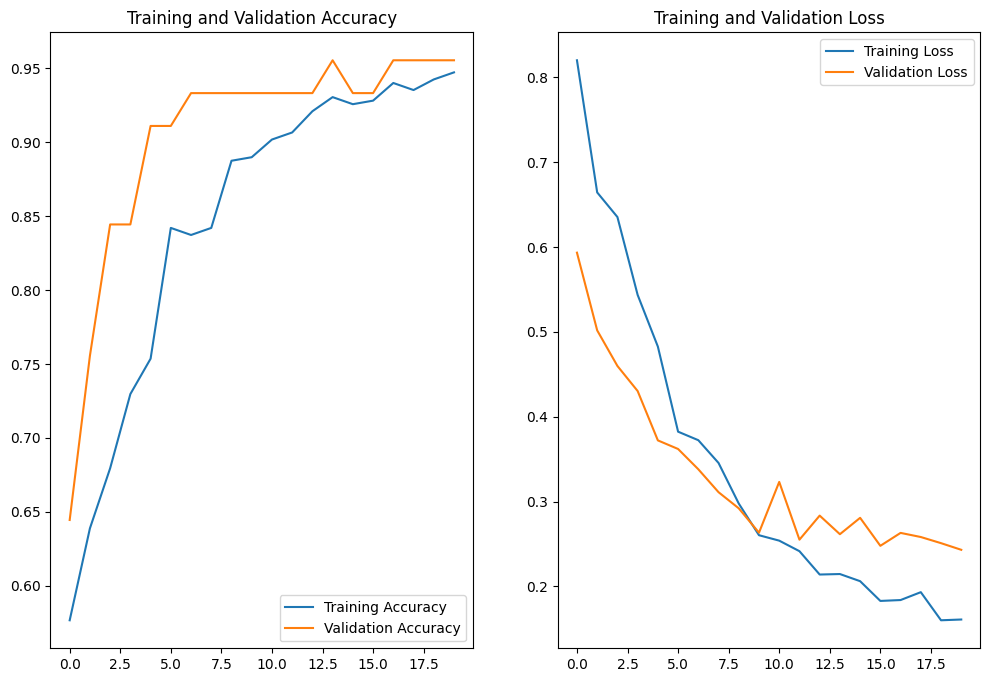

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [32]:
drive.mount('/gdrive', force_remount=True)
loaded_model.save('/gdrive/MyDrive/dataset/Akhund_Human.h5')

Mounted at /gdrive


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [34]:
Y_true = []
Y_pred = []

for i in range(2):
    images = val_data[i][0]
    for image in images:
        image = np.expand_dims(image, axis=0)
        prediction=loaded_model.predict(image)
        Y_pred.append(np.argmax(prediction))

for i in range(2):
    labels = val_data[i][1]
    for label in labels:
        # print(np.argmax(label.tolist()))
        Y_true.append(np.argmax(label.tolist()))  # append list

1/1 [==============================] - 0s 20ms/step


['Akhund', 'Human']


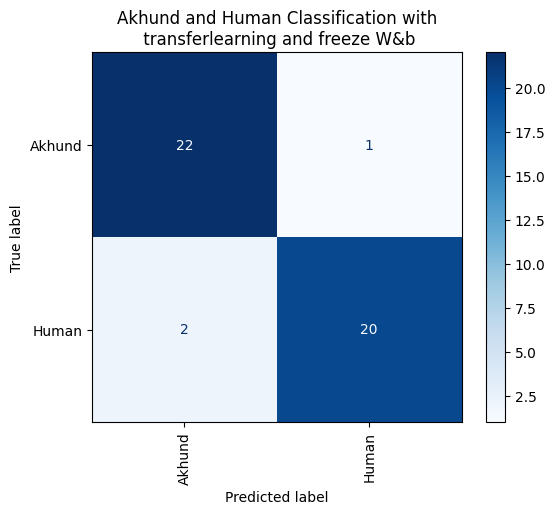

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

labels=[]
for i in val_data.class_indices:
  labels.append(i)
print(labels)
cm = confusion_matrix(Y_true, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues,xticks_rotation=90)
plt.title("Akhund and Human Classification with\n transferlearning and freeze W&b")
# plt.savefig('output/confusionmatric_floweraug.jpg')
plt.show()